# Importing Libraries

In [2]:
#!pip install torch==1.8.0
import numpy as np
import torch
import time
import torch.utils.data
from torch.utils.data.dataset import Dataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import random

# Importing Dataset and Training settings
## Please DO NOT change this part

In [3]:
print(f'Pytorch version: {torch.__version__}')
print(f'cuda version: {torch.version.cuda}')
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

Pytorch version: 1.9.0+cu111
cuda version: 11.1
cuda


In [4]:
def START_seed():
    seed = 42
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

cnn_features1 = 6 # number of feature maps
cnn_features2 = 16
lr = 0.03
epochs=30

## Load data

In [5]:
CLASSES = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
train_batch_size = 64
test_batch_size = 64
START_seed()

#train_transform = transforms.Compose([transforms.RandomHorizontalFlip(), transforms.ToTensor()])
train_transform = transforms.Compose([transforms.ToTensor()])

test_transform = transforms.Compose([transforms.ToTensor()])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)

train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=train_batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=test_batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


## Visualizing Data

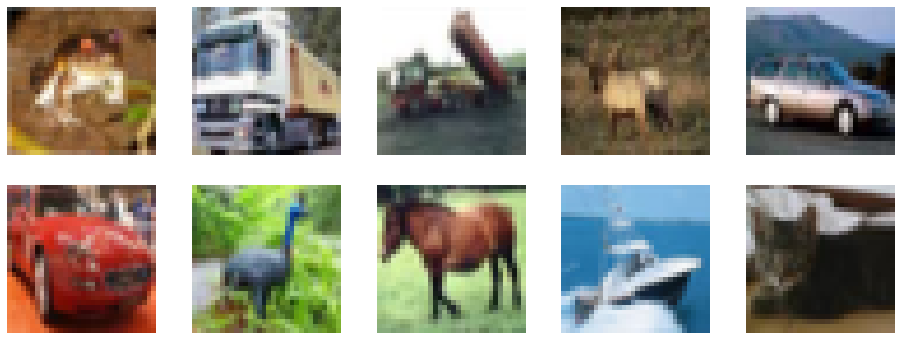

In [7]:
# show some images
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image, _ = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().permute(1,2,0).numpy())
    plt.axis('off');

## Creating training loop

In [8]:





def train(epoch, model):
    model.train()
    
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)

        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test(model):   
    model.eval()

    test_loss = 0
    correct = 0

    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)

        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss

        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    acc_drop_20.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

# Task0:
## Running the base architecture
Please run the following cells

In [9]:
class Lenet5(nn.Module):
    def __init__(self, cnn_features1=6, cnn_features2=16):
        super(Lenet5, self).__init__()
        self.cnn_features1 = cnn_features1 # 6
        self.cnn_features2 = cnn_features2 # 16

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=cnn_features1, kernel_size=5) 
        self.conv2 = nn.Conv2d(in_channels=cnn_features1, out_channels=cnn_features2, kernel_size=5)

        self.fc1 = nn.Linear(cnn_features2*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        


    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)

        x = self.conv2(x)
        
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)

        x = x.view(-1, self.cnn_features2*5*5)

        x = self.fc1(x)
        
        x = F.relu(x)

        x = self.fc2(x)
        
        x = F.relu(x)

        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)

        return x

## Displaying Network Architecture and Number of Parameters

In [10]:
START_seed()
model = Lenet5(cnn_features1, cnn_features2)

# print the network summary
print(model)

pytorch_total_params = sum(p.numel() for p in  model.parameters())
print('Number of parameters: {0}'.format(pytorch_total_params))

Lenet5(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Number of parameters: 62006


## Creating the Model and optimizer and Starting training

In [11]:
optimizer = optim.SGD(model.parameters(), lr=lr) 

model.to(device)
start = time.time()
for epoch in range(0, epochs):
    train(epoch, model)
    test(model)
end = time.time()
Total_time=end-start
print('Total training and inference time is: {0}'.format(Total_time))
start = time.time()
test(model)
end = time.time()
Test_time=end-start
print('Total inference time is: {0}'.format(Test_time))
Training_time=Total_time-(Test_time*epochs)
print('Total Training time is: {0}'.format(Training_time))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train Epoch: 0 [0/50000 (0%)]	Loss: 2.299281
Train Epoch: 0 [6400/50000 (13%)]	Loss: 2.291440
Train Epoch: 0 [12800/50000 (26%)]	Loss: 2.295360
Train Epoch: 0 [19200/50000 (38%)]	Loss: 2.299400
Train Epoch: 0 [25600/50000 (51%)]	Loss: 2.302066
Train Epoch: 0 [32000/50000 (64%)]	Loss: 2.293673
Train Epoch: 0 [38400/50000 (77%)]	Loss: 2.243831
Train Epoch: 0 [44800/50000 (90%)]	Loss: 2.334722


NameError: ignored

# Task1:Modifying maxpooling layer



## 1.1 Please modify the following network by  changing every maxpool layer with avgpool layer 

In [ ]:
class Lenet5_avg(nn.Module):
    def __init__(self, cnn_features1=6, cnn_features2=16):
        super(Lenet5_avg, self).__init__()
        self.cnn_features1 = cnn_features1 # 6
        self.cnn_features2 = cnn_features2 # 16

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=cnn_features1, kernel_size=5) 
        self.conv2 = nn.Conv2d(in_channels=cnn_features1, out_channels=cnn_features2, kernel_size=5)

        self.fc1 = nn.Linear(cnn_features2*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        


    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.avg_pool2d(x, kernel_size=2)

        x = self.conv2(x)
        
        x = F.relu(x)
        x = F.avg_pool2d(x, kernel_size=2)

        x = x.view(-1, self.cnn_features2*5*5)

        x = self.fc1(x)
        
        x = F.relu(x)

        x = self.fc2(x)
        
        x = F.relu(x)

        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)

        return x

## Displaying Network Architecture and Number of Parameters

In [ ]:
START_seed()
model = Lenet5_avg(cnn_features1, cnn_features2)

# print the network summary
print(model)

pytorch_total_params = sum(p.numel() for p in  model.parameters())
print('Number of parameters: {0}'.format(pytorch_total_params))

Lenet5_avg(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Number of parameters: 62006


## Creating the Model and optimizer and Starting training

In [12]:
optimizer = optim.SGD(model.parameters(), lr=lr) 

model.to(device)
start = time.time()
for epoch in range(0, epochs):
    train(epoch, model)
    test(model)
end = time.time()
Total_time=end-start
print('Total training and inference time is: {0}'.format(Total_time))
start = time.time()
test(model)
end = time.time()
Test_time=end-start
print('Total inference time is: {0}'.format(Test_time))
Training_time=Total_time-(Test_time*epochs)
print('Total Training time is: {0}'.format(Training_time))

Train Epoch: 0 [0/50000 (0%)]	Loss: 2.138057
Train Epoch: 0 [6400/50000 (13%)]	Loss: 2.153321
Train Epoch: 0 [12800/50000 (26%)]	Loss: 2.167635
Train Epoch: 0 [19200/50000 (38%)]	Loss: 2.112159


KeyboardInterrupt: ignored

## 1.2 please modify the following network by removing maxpool layers and utlize convolutions with stride >1 
Number of parameters must be the same as it was in base architecture

In [13]:
class Lenet5_no_pooling(nn.Module):
    def __init__(self, cnn_features1=6, cnn_features2=16):
        super(Lenet5_no_pooling, self).__init__()
        self.cnn_features1 = cnn_features1 # 6
        self.cnn_features2 = cnn_features2 # 16

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=cnn_features1, kernel_size=5,stride=2) 
        self.conv2 = nn.Conv2d(in_channels=cnn_features1, out_channels=cnn_features2, kernel_size=5, stride=2)

        self.fc1 = nn.Linear(cnn_features2*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        


    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        

        x = self.conv2(x)
        
        x = F.relu(x)
        

        x = x.view(-1, self.cnn_features2*5*5)

        x = self.fc1(x)
        
        x = F.relu(x)

        x = self.fc2(x)
        
        x = F.relu(x)

        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)

        return x

## Displaying Network Architecture and Number of Parameters

In [ ]:
START_seed()
model = Lenet5_no_pooling(cnn_features1, cnn_features2)

# print the network summary
print(model)

pytorch_total_params = sum(p.numel() for p in  model.parameters())
print('Number of parameters: {0}'.format(pytorch_total_params))

Lenet5_no_pooling(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(2, 2))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Number of parameters: 62006


## Creating the Model and optimizer and Starting training

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=lr) 

model.to(device)
start = time.time()
for epoch in range(0, epochs):
    train(epoch, model)
    test(model)
end = time.time()
Total_time=end-start
print('Total training and inference time is: {0}'.format(Total_time))
start = time.time()
test(model)
end = time.time()
Test_time=end-start
print('Total inference time is: {0}'.format(Test_time))
Training_time=Total_time-(Test_time*epochs)
print('Total Training time is: {0}'.format(Training_time))

# Task2:Adding Dropout to the Base Network
### Please modify the following network by introducing dropout layer(s)
### dropout documentation link:https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html

In [ ]:
class Lenet5_dropout(nn.Module):
    def __init__(self, cnn_features1=6, cnn_features2=16):
        super(Lenet5_dropout, self).__init__()
        self.cnn_features1 = cnn_features1 # 6
        self.cnn_features2 = cnn_features2 # 16

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=cnn_features1, kernel_size=5) 
        self.conv2 = nn.Conv2d(in_channels=cnn_features1, out_channels=cnn_features2, kernel_size=5)

        self.fc1 = nn.Linear(cnn_features2*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        


    def forward(self, x):
        x = self.conv1(x)
        x = F.dropout(x,0.9)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)

        x = self.conv2(x)
        x = F.dropout(x,0.9)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)

        x = x.view(-1, self.cnn_features2*5*5)

        x = self.fc1(x)
        
        x = F.relu(x)

        x = self.fc2(x)
        
        x = F.relu(x)

        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)

        return x

## Displaying Network Architecture and Number of Parameters

In [ ]:
START_seed()
model = Lenet5_dropout(cnn_features1, cnn_features2)

# print the network summary
print(model)

pytorch_total_params = sum(p.numel() for p in  model.parameters())
print('Number of parameters: {0}'.format(pytorch_total_params))

Lenet5_dropout(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Number of parameters: 62006


## Creating the Model and optimizer and Starting training

Train Epoch: 0 [0/50000 (0%)]	Loss: 2.330633
Train Epoch: 0 [6400/50000 (13%)]	Loss: 2.287836
Train Epoch: 0 [12800/50000 (26%)]	Loss: 2.281714
Train Epoch: 0 [19200/50000 (38%)]	Loss: 2.251197
Train Epoch: 0 [25600/50000 (51%)]	Loss: 2.243577
Train Epoch: 0 [32000/50000 (64%)]	Loss: 2.233271
Train Epoch: 0 [38400/50000 (77%)]	Loss: 2.253310
Train Epoch: 0 [44800/50000 (90%)]	Loss: 2.191736

Test set: Average loss: 2.2092, Accuracy: 1779/10000 (18%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.272461
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.210374
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.210178
Train Epoch: 1 [19200/50000 (38%)]	Loss: 2.222188
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.189101
Train Epoch: 1 [32000/50000 (64%)]	Loss: 2.168245
Train Epoch: 1 [38400/50000 (77%)]	Loss: 2.147487
Train Epoch: 1 [44800/50000 (90%)]	Loss: 2.112090

Test set: Average loss: 2.1342, Accuracy: 2168/10000 (22%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 2.044546
Train Epoch: 2 [6400/50000 (13%)]	Loss: 2.186

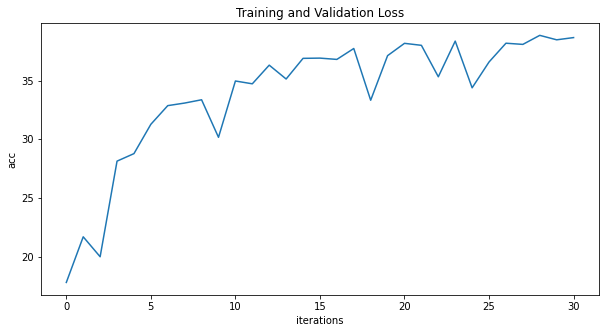

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=lr) 

model.to(device)

start = time.time()
for epoch in range(0, epochs):
    train(epoch, model)
    test(model)
end = time.time()
Total_time=end-start
print('Total training and inference time is: {0}'.format(Total_time))
start = time.time()
test(model)
end = time.time()
Test_time=end-start
print('Total inference time is: {0}'.format(Test_time))
Training_time=Total_time-(Test_time*epochs)
print('Total Training time is: {0}'.format(Training_time))


x=np.linspace(0, epochs, num=epochs+1)

print(acc_drop_20)
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(x,acc_drop_20)
plt.xlabel("iterations")
plt.ylabel("acc")
plt.show()

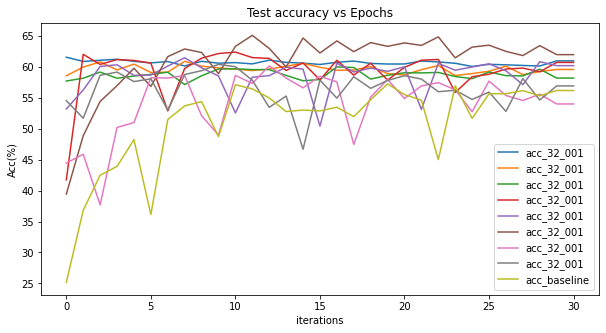

In [56]:
#plt.figure(figsize=(10,5))
#plt.title("Test accuracy vs Epochs")
#plt.plot(acc_16_001,label="acc_32_001")
#plt.plot(acc_16_003,label="acc_32_001")
#plt.plot(acc_16_005,label="acc_32_001")
#plt.plot(acc_32_003,label="acc_32_001")
#plt.plot(acc_32_005,label="acc_32_001")
#plt.plot(acc_32_001,label="acc_32_001")
#plt.plot(acc_64_003,label="acc_32_001")
#plt.plot(acc_64_005,label="acc_32_001")
#plt.plot(acc_baseline,label="acc_baseline")
#plt.xlabel("iterations")
#plt.ylabel("Acc(%)")
#plt.legend()
#plt.show()

# Task3:Adding Batchnorm Layer(s) to the Base Network
### Please modify the following architecture by introducing BN layers
### You may change batch size, learning rate and/or momentum
### Batch normalization documentation link:
https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html

In [69]:
START_seed()
train_batch_size = 64 #try different batch sizes
lr = 0.01
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=train_batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=test_batch_size, shuffle=False)

In [70]:
class Lenet5_BN(nn.Module):
    def __init__(self, cnn_features1=6, cnn_features2=16):
        super(Lenet5_BN, self).__init__()
        self.cnn_features1 = cnn_features1 # 6
        self.cnn_features2 = cnn_features2 # 16

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=cnn_features1, kernel_size=5) 
        self.bn1 = nn.BatchNorm2d(cnn_features1)
        self.conv2 = nn.Conv2d(in_channels=cnn_features1, out_channels=cnn_features2, kernel_size=5)
        self.bn2 = nn.BatchNorm2d(cnn_features2)

        self.fc1 = nn.Linear(cnn_features2*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        


    def forward(self, x):
        x = self.conv1(x)       
        x = F.relu(x)
        x = self.bn1(x)
        x = F.max_pool2d(x, kernel_size=2)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.bn2(x)
        x = F.max_pool2d(x, kernel_size=2)

        x = x.view(-1, self.cnn_features2*5*5)

        x = self.fc1(x)
        
        x = F.relu(x)

        x = self.fc2(x)
        
        x = F.relu(x)

        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)

        return x

## Displaying Network Architecture and Number of Parameters

In [71]:
START_seed()
model = Lenet5_BN(cnn_features1, cnn_features2)
# print the network summary
print(model)

pytorch_total_params = sum(p.numel() for p in model.parameters())
print('Number of parameters: {0}'.format(pytorch_total_params))

Lenet5_BN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Number of parameters: 62050


## Creating the Model and optimizer and Starting training

In [ ]:
lr=0.05 #choose your learning rate
optimizer = optim.SGD(model.parameters(), lr=lr) #choose suitable learning rate and momentum

model.to(device)
start = time.time()
for epoch in range(0, epochs):
    train(epoch, model)
    test(model)
end = time.time()
Total_time=end-start
print('Total training and inference time is: {0}'.format(Total_time))
start = time.time()
test(model)
end = time.time()
Test_time=end-start
print('Total inference time is: {0}'.format(Test_time))
Training_time=Total_time-(Test_time*epochs)
print('Total Training time is: {0}'.format(Training_time))

Train Epoch: 0 [0/50000 (0%)]	Loss: 1.428824
Train Epoch: 0 [1600/50000 (3%)]	Loss: 1.486962
Train Epoch: 0 [3200/50000 (6%)]	Loss: 0.765880
Train Epoch: 0 [4800/50000 (10%)]	Loss: 1.098148
Train Epoch: 0 [6400/50000 (13%)]	Loss: 1.585469
Train Epoch: 0 [8000/50000 (16%)]	Loss: 1.257305
Train Epoch: 0 [9600/50000 (19%)]	Loss: 1.019501
Train Epoch: 0 [11200/50000 (22%)]	Loss: 1.382118
Train Epoch: 0 [12800/50000 (26%)]	Loss: 1.156981
Train Epoch: 0 [14400/50000 (29%)]	Loss: 1.512545
Train Epoch: 0 [16000/50000 (32%)]	Loss: 1.421370
Train Epoch: 0 [17600/50000 (35%)]	Loss: 0.748283
Train Epoch: 0 [19200/50000 (38%)]	Loss: 0.960494
Train Epoch: 0 [20800/50000 (42%)]	Loss: 1.176413
Train Epoch: 0 [22400/50000 (45%)]	Loss: 1.272191
Train Epoch: 0 [24000/50000 (48%)]	Loss: 0.808127
Train Epoch: 0 [25600/50000 (51%)]	Loss: 1.118200
Train Epoch: 0 [27200/50000 (54%)]	Loss: 1.151217
Train Epoch: 0 [28800/50000 (58%)]	Loss: 0.976351
Train Epoch: 0 [30400/50000 (61%)]	Loss: 1.167165
Train Epoch: 

# Task4: Applying Dropout and Batch normalization on the base network
## Please modify the following network by adding both dropout and batch normalization layer/s

In [75]:
class Lenet5_Drop_BN(nn.Module):
    def __init__(self, cnn_features1=6, cnn_features2=16):
        super(Lenet5_Drop_BN, self).__init__()
        self.cnn_features1 = cnn_features1 # 6
        self.cnn_features2 = cnn_features2 # 16

        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=cnn_features1, kernel_size=5) 
        self.bn1 = nn.BatchNorm2d(cnn_features1)
        self.conv2 = nn.Conv2d(in_channels=cnn_features1, out_channels=cnn_features2, kernel_size=5)
        self.bn2 = nn.BatchNorm2d(cnn_features2)

        self.fc1 = nn.Linear(cnn_features2*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        


    def forward(self, x):
        x = self.conv1(x)       
        x = F.relu(x)
        x = self.bn1(x)
        x = F.dropout(x, 0.5)
        x = F.max_pool2d(x, kernel_size=2)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.bn2(x)
        x = F.dropout(x, 0.5)
        x = F.max_pool2d(x, kernel_size=2)

        x = x.view(-1, self.cnn_features2*5*5)

        x = self.fc1(x)
        
        x = F.relu(x)

        x = self.fc2(x)
        
        x = F.relu(x)

        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)

        return x

## Displaying Network Architecture and Number of Parameters

In [80]:
acc_drop_20=[]
START_seed()
train_batch_size = 16 #try different batch sizes
lr = 0.03
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=train_batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=test_batch_size, shuffle=False)
model = Lenet5_Drop_BN(cnn_features1, cnn_features2)

# print the network summary
print(model)

pytorch_total_params = sum(p.numel() for p in model.parameters())
print('Number of parameters: {0}'.format(pytorch_total_params))

Lenet5_Drop_BN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Number of parameters: 62050


## Creating the Model and optimizer and Starting training

In [81]:
optimizer = optim.SGD(model.parameters(), lr=lr) 

model.to(device)
start = time.time()
for epoch in range(0, epochs):
    train(epoch, model)
    test(model)
end = time.time()
Total_time=end-start
print('Total training and inference time is: {0}'.format(Total_time))
start = time.time()
test(model)
end = time.time()
Test_time=end-start
print('Total inference time is: {0}'.format(Test_time))
Training_time=Total_time-(Test_time*epochs)
print('Total Training time is: {0}'.format(Training_time))

Train Epoch: 0 [0/50000 (0%)]	Loss: 2.361547
Train Epoch: 0 [1600/50000 (3%)]	Loss: 1.958806
Train Epoch: 0 [3200/50000 (6%)]	Loss: 1.841558
Train Epoch: 0 [4800/50000 (10%)]	Loss: 1.704011
Train Epoch: 0 [6400/50000 (13%)]	Loss: 2.287217
Train Epoch: 0 [8000/50000 (16%)]	Loss: 2.179078
Train Epoch: 0 [9600/50000 (19%)]	Loss: 1.862932
Train Epoch: 0 [11200/50000 (22%)]	Loss: 1.654126
Train Epoch: 0 [12800/50000 (26%)]	Loss: 1.769747
Train Epoch: 0 [14400/50000 (29%)]	Loss: 1.788103
Train Epoch: 0 [16000/50000 (32%)]	Loss: 1.716366
Train Epoch: 0 [17600/50000 (35%)]	Loss: 1.650118
Train Epoch: 0 [19200/50000 (38%)]	Loss: 1.831995
Train Epoch: 0 [20800/50000 (42%)]	Loss: 1.564240
Train Epoch: 0 [22400/50000 (45%)]	Loss: 1.496750
Train Epoch: 0 [24000/50000 (48%)]	Loss: 1.326477
Train Epoch: 0 [25600/50000 (51%)]	Loss: 1.498640
Train Epoch: 0 [27200/50000 (54%)]	Loss: 1.595948
Train Epoch: 0 [28800/50000 (58%)]	Loss: 1.623686
Train Epoch: 0 [30400/50000 (61%)]	Loss: 1.612163
Train Epoch: 

# Task5:One Network to Best Them All
### Using the previous observations and what you learned in the lecture please modify the following architecture to achieve best possible accuracy.
Examples of architectural changes to the baseline: adding more convolutional layers, more channels perconvolution layer, more fully connected layers, dropout, BN, data-augmentations, etc

# Add Your Augmentations
to read more about the availabe augmentations check the documentation:https://pytorch.org/vision/stable/transforms.html

In [ ]:
START_seed()
train_transform = transforms.Compose([transforms.ToTensor()])#add transformations here
train_batch_size=64 #choose your batch size
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=train_batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=test_batch_size, shuffle=False)

## Modify the Base Model

In [ ]:
class Yournet5(nn.Module):
    def __init__(self):
        super(Yournet5, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5,padding=2) 
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=20, kernel_size=5,padding=2)
        self.conv3 = nn.Conv2d(in_channels=20, out_channels=32, kernel_size=5,padding=2)

        self.fc1 = nn.Linear(32*4*4, 80)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(80, 10)
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(20)
        self.bn3 = nn.BatchNorm2d(32)
        self.BN_fc1 = nn.BatchNorm1d(80)
        self.BN_fc2 = nn.BatchNorm1d(84)
        


    def forward(self, x):
        #x 32x32
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        #x 32x32
        x = F.max_pool2d(x, kernel_size=2)
        
        #x 16x16

        x = self.conv2(x)
        #x 16x16
        x = self.bn2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        #x 8x8
        
        x = self.conv3(x)
        x = self.bn3(x)
        #x 8x8
        
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        #x 4x4

        x = x.view(-1, 32*4*4)

        x = self.fc1(x)
        x = self.BN_fc1(x)
        x = F.relu(x)

        #x = self.fc2(x)
        #x = self.BN_fc2(x)
        # x = F.relu(x)

        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)

        return x

Displaying Network Architecture and Number of Parameters

In [ ]:
START_seed()
model = Yournet5()
# print the network summary
print(model)
pytorch_total_params = sum(p.numel() for p in  model.parameters())
print('Number of parameters: {0}'.format(pytorch_total_params))

Training

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.03) #change optimizer parameters to your liking

model.to(device)
start = time.time()
for epoch in range(0, epochs):
    train(epoch, model)
    test(model)
end = time.time()
Total_time=end-start
print('Total training and inference time is: {0}'.format(Total_time))
start = time.time()
test(model)
end = time.time()
Test_time=end-start
print('Total inference time is: {0}'.format(Test_time))
Training_time=Total_time-(Test_time*epochs)
print('Total Training time is: {0}'.format(Training_time))

In [14]:
#acc_final= [25.15, 36.83, 49, 46, 65, 64, 50, 69, 57, 68, 68, 69, 70, 69, 73, 71, 72, 71, 72, 71, 72, 71, 72, 72, 73, 72, 73, 72, 68, 71, 71]

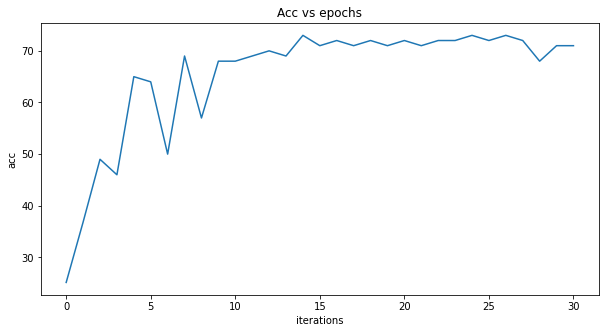

In [15]:
x=np.linspace(0, epochs, num=epochs+1)


plt.figure(figsize=(10,5))
plt.title("Acc vs epochs")
plt.plot(x,acc_final)
plt.xlabel("iterations")
plt.ylabel("acc")
plt.show()